<a href="https://colab.research.google.com/github/chad-fisher/SpatialDataScienceSandbox/blob/main/Geoprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wrangling Spatial Data with Python
Presented by Chad Fisher, Geospatial Data Science Specialist, TTS Research Technology

11.6.24

[GitHub repo](https://github.com/chad-fisher/SpatialDataScienceSandbox/blob/main/Geoprocessing.ipynb)

When collecting data for a project, it can get messy to find and download data, get it all into the same projection, and get everything down to the same extent. Today, we'll walk through some example data you might need to start thinking about if you wanted to look at invasive species on campus.

# Datasets



1. iNaturalist species observation data: pyinaturalist
2. Census data: pygris
3. Earth Engine Data catalog: geemap
4. Data only available as JSON: convert to shapefile
5. Combining tiles, masking



# iNaturalist species observations of bees on campus

In [53]:
!pip install pyinaturalist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.2 MB/s eta 0:00:00


In [55]:
import pyinaturalist
import pandas as pd
import geopandas as gpd

In [102]:
years=[2020,2021,2022,2023,2024]

In [193]:
taxon_id=pyinaturalist.v1.taxa.get_taxa(q='Bombus impatiens',rank='species')['results'][0]['id']
place_id=pyinaturalist.v1.places.get_places_autocomplete(q='Tufts University')['results'][0]['id']

In [194]:
place_id

193616

In [195]:
response=pyinaturalist.v1.observations.get_observations(year=years,taxon_id=taxon_id,geo=True,page='all',place_id=place_id)

In [196]:
my_observations = pyinaturalist.Observation.from_json_list(response)
df = pd.DataFrame([{
          'ID': o.id,
          'latitude': o.location[0],
          'longitude': o.location[1],
          'date': o.observed_on.isoformat(),
          'quality': o.quality_grade,
          'uri': o.uri
          }
                   for o in my_observations
                   if o.location
                   ]
                  )

In [197]:
obs=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
obs

,ID,latitude,longitude,date,quality,uri,geometry
0,47652499,42.403197,-71.113664,2020-05-28T13:56:59-04:00,research,https://www.inaturalist.org/observations/47652499,POINT (-71.11366 42.4032)
1,52630071,42.403207,-71.120631,2020-07-10T14:30:00-04:00,research,https://www.inaturalist.org/observations/52630071,POINT (-71.12063 42.40321)
2,52630076,42.403074,-71.120692,2020-07-10T14:30:00-04:00,research,https://www.inaturalist.org/observations/52630076,POINT (-71.12069 42.40307)
3,52630086,42.403236,-71.120422,2020-07-10T14:30:00-04:00,research,https://www.inaturalist.org/observations/52630086,POINT (-71.12042 42.40324)
4,53082059,42.403134,-71.120704,2020-07-13T00:00:00,research,https://www.inaturalist.org/observations/53082059,POINT (-71.1207 42.40313)
...,...,...,...,...,...,...,...
269,242739889,42.406383,-71.119658,2024-09-05T13:43:09-04:00,research,https://www.inaturalist.org/observations/24273...,POINT (-71.11966 42.40638)
270,242740138,42.403013,-71.113831,2024-09-08T18:01:56-04:00,research,https://www.inaturalist.org/observations/24274...,POINT (-71.11383 42.40301)
271,243460681,42.406617,-71.119506,2024-09-20T11:51:14-04:00,research,https://www.inaturalist.org/observations/24346...,POINT (-71.11951 42.40662)
272,246359586,42.406580,-71.121780,2024-10-08T14:57:56-04:00,research,https://www.inaturalist.org/observations/24635...,POINT (-71.12178 42.40658)


<Axes: >

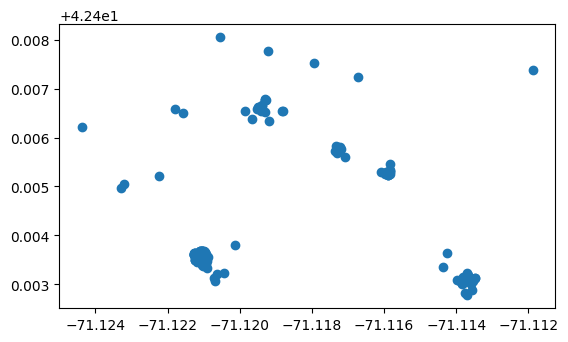

In [198]:
obs.plot()

In [185]:
!mkdir iNatData
obs.to_file('iNatData/iNat.shp')

mkdir: cannot create directory ‘iNatData’: File exists


In [186]:
import shutil
shutil.make_archive('iNatData', 'zip', 'iNatData')

'/content/iNatData.zip'

In [51]:
!wget https://dsl.richmond.edu/panorama/redlining/static/citiesData/MASomerville1939/geojson.json -O Redlining/Somerville.json
!wget https://dsl.richmond.edu/panorama/redlining/static/citiesData/MAMedford19XX/geojson.json -O Redlining/Medford.json

--2024-10-11 14:47:25--  https://dsl.richmond.edu/panorama/redlining/static/citiesData/MASomerville1939/geojson.json
Resolving dsl.richmond.edu (dsl.richmond.edu)... 141.166.39.124
Connecting to dsl.richmond.edu (dsl.richmond.edu)|141.166.39.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9360 (9.1K) [application/json]
Saving to: ‘Redlining/Somerville.json’

Redlining/Somervill 100%[===================>]   9.14K  --.-KB/s    in 0s      

2024-10-11 14:47:25 (71.8 MB/s) - ‘Redlining/Somerville.json’ saved [9360/9360]

--2024-10-11 14:47:25--  https://dsl.richmond.edu/panorama/redlining/static/citiesData/MAMedford19XX/geojson.json
Resolving dsl.richmond.edu (dsl.richmond.edu)... 141.166.39.124
Connecting to dsl.richmond.edu (dsl.richmond.edu)|141.166.39.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11531 (11K) [application/json]
Saving to: ‘Redlining/Medford.json’

Redlining/Medford.j 100%[===================>]  11.26K  --.-KB

In [5]:
!wget https://tufts.box.com/shared/static/o4obicp84832t6lzdckrc3935ryy330i.zip

--2024-10-11 13:20:17--  https://tufts.box.com/shared/static/o4obicp84832t6lzdckrc3935ryy330i.zip
Resolving tufts.box.com (tufts.box.com)... 74.112.186.157
Connecting to tufts.box.com (tufts.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/o4obicp84832t6lzdckrc3935ryy330i.zip [following]
--2024-10-11 13:20:17--  https://tufts.box.com/public/static/o4obicp84832t6lzdckrc3935ryy330i.zip
Reusing existing connection to tufts.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tufts.app.box.com/public/static/o4obicp84832t6lzdckrc3935ryy330i.zip [following]
--2024-10-11 13:20:17--  https://tufts.app.box.com/public/static/o4obicp84832t6lzdckrc3935ryy330i.zip
Resolving tufts.app.box.com (tufts.app.box.com)... 74.112.186.157
Connecting to tufts.app.box.com (tufts.app.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https:/

In [2]:
import zipfile

In [6]:
zipfile.ZipFile('o4obicp84832t6lzdckrc3935ryy330i.zip').extractall()

In [7]:
import glob

In [10]:
glob.glob('/content/Somerville/*.shp')

['/content/Somerville/Parks.shp',
 '/content/Somerville/CityBlocks.shp',
 '/content/Somerville/Parcels2004.shp',
 '/content/Somerville/Streetscl.shp',
 '/content/Somerville/CityBoundary.shp',
 '/content/Somerville/neighborhoods.shp',
 '/content/Somerville/Buildings.shp']

In [12]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 19.1 MB/s eta 0:00:00


In [13]:
import contextily as cx

In [14]:
import geopandas as gpd

In [15]:
gpd.read_file(glob.glob('/content/Somerville/*.shp')[0])

,ID,PARK_NAME,AdoptASpot,AAS,geometry
0,1,Alewife Brook Park (MDC),None,NaN,"POLYGON ((756852.084 2977579.272, 756858.161 2..."
1,2,Central Hill Playground,Yes,1.0,"POLYGON ((765311.435 2965930.666, 765321.24 29..."
2,3,Draw 7 Park (MDC),None,NaN,"POLYGON ((770479.103 2967722.082, 770462.717 2..."
3,4,Foss Park (MDC),None,NaN,"POLYGON ((767861.858 2968692.659, 767981.029 2..."
4,5,Trum Field,Yes,1.0,"POLYGON ((762057.721 2970438.91, 762222.931 29..."
5,6,Nathan Tufts/Powder House Park,None,NaN,"POLYGON ((760099.876 2971323.122, 760019.672 2..."
6,7,Hodgkins/Curtin Park,Yes,1.0,"POLYGON ((757508.495 2971116.33, 757595.673 29..."
7,8,Dilboy Field (MDC),None,NaN,"POLYGON ((755441.167 2976283.564, 755598.877 2..."
8,9,North Street Playground,Yes,1.0,"POLYGON ((755841.994 2973387.021, 755799.143 2..."
9,10,Woodstock Playground,Yes,1.0,"POLYGON ((755015.292 2972697.063, 755080.731 2..."


In [17]:
Parks = gpd.read_file(glob.glob('/content/Somerville/*.shp')[0])

<Axes: >

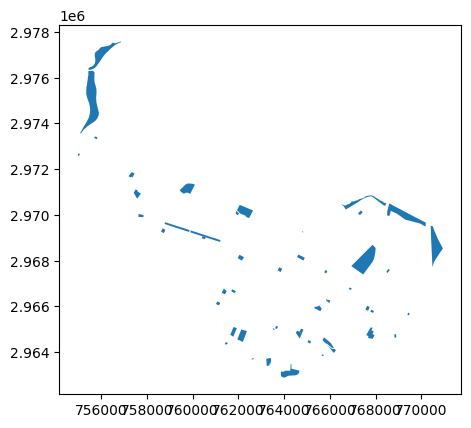

In [19]:
Parks.plot()

In [21]:
Parks.crs

<Projected CRS: PROJCS["NAD83 / Massachusetts Mainland (ftUS)",GEO ...>
Name: NAD83 / Massachusetts Mainland (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

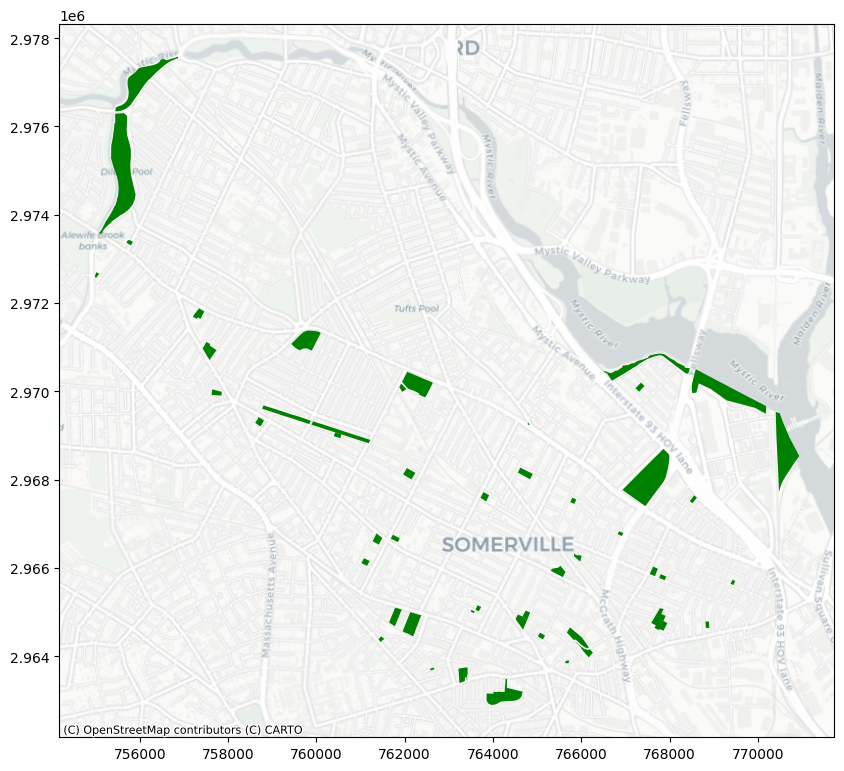

In [24]:
ax=Parks.plot(figsize=(10,10),color='green')
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=Parks.crs)

In [25]:
import ipyleaflet

In [34]:
m = ipyleaflet.Map(center=[42.389122, -71.097145], zoom=13,basemap = ipyleaflet.basemaps.CartoDB.Positron())
m

Map(center=[42.389122, -71.097145], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [40]:
Somerville=gpd.read_file('/content/Somerville/CityBoundary.shp')

In [41]:
m.add_layer(Somerville)
m

Map(bottom=775620.0, center=[42.39151573685182, -71.09579082414018], controls=(ZoomControl(options=['position'…

In [42]:
m.add_layer(Somerville.to_crs('EPSG:4326'))
m

Map(bottom=775620.0, center=[42.39151573685182, -71.09579082414018], controls=(ZoomControl(options=['position'…